# 1. Import Libraries and Configure Settings

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.decomposition import PCA

# 2. Import Dataset

In [2]:
nl = pd.read_csv('datas/listings 2.csv')
nl.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20210710185946,2021-07-11,Hyde Park - Walk to University of Chicago,"If you have been fully vaccinated, you are inv...",The apartment is less than one block from beau...,https://a0.muscache.com/pictures/acf6b3c0-47f2...,2613,https://www.airbnb.com/users/show/2613,...,4.98,4.95,4.94,R17000015609,f,1,0,1,0,2.45
1,7126,https://www.airbnb.com/rooms/7126,20210710185946,2021-07-11,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhoo...,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,https://www.airbnb.com/users/show/17928,...,4.85,4.87,4.72,R18000034991,f,1,1,0,0,3.32
2,10945,https://www.airbnb.com/rooms/10945,20210710185946,2021-07-11,The Biddle House (#1),Beautiful first floor apartment in Historic Ol...,NaN,https://a0.muscache.com/pictures/58d1a420-a24b...,33004,https://www.airbnb.com/users/show/33004,...,4.64,4.96,4.54,2120297,t,10,10,0,0,0.32
3,12068,https://www.airbnb.com/rooms/12068,20210710185946,2021-07-10,Chicago GOLD COAST 1 Bedroom Condo,Available as extended stay rental located in C...,The condo is on Lasalle just off of Division; ...,https://a0.muscache.com/pictures/110562313/69f...,40731,https://www.airbnb.com/users/show/40731,...,4.73,4.73,4.73,City registration pending,f,1,1,0,0,0.14
4,12140,https://www.airbnb.com/rooms/12140,20210710185946,2021-07-10,Lincoln Park Guest House,Bed and Breakfast license issued by the City o...,The Guest House is in the heart of Chicago's m...,https://a0.muscache.com/pictures/55126/6a4f01b...,46734,https://www.airbnb.com/users/show/46734,...,5.00,5.00,5.00,R20000055258,f,1,0,1,0,0.10


# 3. Further Cleanse and Transform Data

## 3.1 Remove irrelavant column:

### Data Selection
Raw listings data contained 74 columns and 6366 rows, but the data was narrowed down to 59 features that have meaningful impact on price predict, recommendation system, and customer satisfication predict. The features that were removed were the following:
- listing_url, picture_url, host_url, host_thumbnail_url, host_picture_url: url is not useful for our project
- scrape_id, last_scraped, calendar_updated, calendar_last_scraped
- neighbourhood_group_cleansed, 

In [3]:
nl = nl.drop(['listing_url', 'scrape_id', 'picture_url', 'host_url', 'host_location', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'host_listings_count'], axis=1)
nl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6366 non-null   int64  
 1   last_scraped                                  6366 non-null   object 
 2   name                                          6366 non-null   object 
 3   description                                   6352 non-null   object 
 4   neighborhood_overview                         4663 non-null   object 
 5   host_id                                       6366 non-null   int64  
 6   host_name                                     6365 non-null   object 
 7   host_since                                    6365 non-null   object 
 8   host_about                                    4381 non-null   object 
 9   host_response_time                            5187 non-null   o

## 3.2 Rename the columns to make the dataset easy to understand

In [4]:
nl = nl.rename(columns={'id':'property_id', 'bathrooms_text':'bathrooms'})

## 3.3 Transform Data and Create Variables

Try to splite bathrooms column into multiple columns, then drop unnecessary colums. Change private, shared, and half-bath to 0.5, because they all indicates 0.5 bathroom.

In [5]:
bath = nl['bathrooms'].str.split(' ', expand = True)
bath = bath.drop([1,2], axis=1)
nl['bathrooms'] = bath[0].replace(['Private', 'Shared', 'Half-bath'], '0.5')
nl['bathrooms'] = nl['bathrooms'].astype('float')
nl['bathrooms'].unique()

array([ 1. ,  2. ,  1.5,  3. ,  2.5,  0. ,  3.5, 11. ,  5. ,  nan,  0.5,
        4. ,  4.5, 11.5,  6.5,  7. ,  5.5,  6. ,  8. , 12.5, 10. ])

First, we don't want to show the '$' and ',' in price column. Let's remove it.

In [6]:
nl['price'] = nl['price'].str.replace('$','')
nl['price'] = nl['price'].str.replace(',','')

/var/folders/l4/02h672sn7w56vdlzj5gtgwzc0000gn/T/ipykernel_34393/2402874456.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nl['price'] = nl['price'].str.replace('$','')


we want to change the data type to float

In [7]:
nl['price'] = nl['price'].astype(float)
nl['price'].head()

0     85.0
1     65.0
2    143.0
3     99.0
4    329.0
Name: price, dtype: float64

we don't want to show '%' in host_response_rate and host_acceptance_rate, then change data type to float

In [8]:
for x in ['host_response_rate', 'host_acceptance_rate']:
    nl[x] = nl[x].str.replace('%', '').astype(float)
    nl[x] = nl[x]/100

In [9]:
nl['host_response_rate'] = nl['host_response_rate'].astype(float)

In [10]:
nl['host_response_rate']

0       1.00
1       1.00
2       1.00
3       0.92
4       1.00
        ... 
6361    1.00
6362    0.98
6363    0.98
6364    1.00
6365    0.95
Name: host_response_rate, Length: 6366, dtype: float64

In [11]:
nl['host_response_rate'] = nl['host_response_rate'].astype(float)

In [12]:
nl['host_response_rate']

0       1.00
1       1.00
2       1.00
3       0.92
4       1.00
        ... 
6361    1.00
6362    0.98
6363    0.98
6364    1.00
6365    0.95
Name: host_response_rate, Length: 6366, dtype: float64

we want to know how long has the host existed？

In [13]:
for x in ['last_scraped', 'host_since']:
    nl[x] = nl[x].str.replace('-','/')
for x in ['last_scraped', 'host_since']:
    nl[x] = pd.to_datetime(nl[x])

In [14]:
nl['host_period'] = nl['last_scraped'] - nl['host_since']

change follow columns' value t to 1, f to 0

In [15]:
def repl_f_t(l):
    l = l.replace('f', 0);
    l = l.replace('t', 1);
    return l
nl['host_is_superhost'] = repl_f_t(nl['host_is_superhost'])
nl['host_identity_verified'] = repl_f_t(nl['host_identity_verified'])
nl['instant_bookable'] = repl_f_t(nl['instant_bookable'])

In [16]:
nl['host_response_rate']

0       1.00
1       1.00
2       1.00
3       0.92
4       1.00
        ... 
6361    1.00
6362    0.98
6363    0.98
6364    1.00
6365    0.95
Name: host_response_rate, Length: 6366, dtype: float64

In [17]:
nl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 62 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   property_id                                   6366 non-null   int64          
 1   last_scraped                                  6366 non-null   datetime64[ns] 
 2   name                                          6366 non-null   object         
 3   description                                   6352 non-null   object         
 4   neighborhood_overview                         4663 non-null   object         
 5   host_id                                       6366 non-null   int64          
 6   host_name                                     6365 non-null   object         
 7   host_since                                    6365 non-null   datetime64[ns] 
 8   host_about                                    4381 non-nul

## 3.4 Remove duplicate rows from dataset

In [18]:
nl = nl.drop_duplicates()

In [19]:
nl = nl.loc[:,~nl.columns.duplicated()]

## 3.5 Dummy Variables

change host_is_superhost, host_identity_verified, and instant_bookable to dummy variabel

In [20]:
x = pd.get_dummies(nl['host_is_superhost'])
nl = pd.concat([nl,x], axis=1)
nl = nl.rename(columns={0.0:'host_is_superhost_f', 1.0:'host_is_superhost_t'})

In [21]:
x1 = pd.get_dummies(nl['host_identity_verified'])
nl = pd.concat([nl,x1], axis=1)
nl = nl.rename(columns={0.0:'host_identity_verified_f', 1.0:'host_identity_verified_t'})

In [22]:
x2 = pd.get_dummies(nl['instant_bookable'])
nl = pd.concat([nl,x2], axis=1)
nl = nl.rename(columns={0.0:'instant_bookable_f', 1.0:'instant_bookable_t'})

In [23]:
nl.head(2)

,property_id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_about,host_response_time,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_period,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t
0,2384,2021-07-11,Hyde Park - Walk to University of Chicago,"If you have been fully vaccinated, you are inv...",The apartment is less than one block from beau...,2613,Rebecca,2008-08-29,My 2 bdrm apartment is a 2nd floor walk-up in ...,within an hour,...,1,0,2.45,4699 days,0,1,0,1,1,0
1,7126,2021-07-11,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhoo...,"Ukrainian Village was just named ""Hottest Neig...",17928,Sarah,2009-05-19,We live in Chicago. We love to travel and see ...,within an hour,...,0,0,3.32,4436 days,0,1,0,1,1,0


## 3.5 Missing Value

In [24]:
pd.set_option('display.max_rows',100)

In [25]:
nl.shape

(6366, 68)

drop few rows that does not effect all dataset

In [52]:
nl.dropna(subset=['description', 'host_period', 'host_name', 'host_since', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'bathrooms'], inplace=True)

In [27]:
# nl.fillna('', inplace=True)
#nl = nl.replace(np.nan, 'unknown', regex=True)

In [28]:
nl.isnull().sum()

property_id                                        0
last_scraped                                       0
name                                               0
description                                        0
neighborhood_overview                           1688
host_id                                            0
host_name                                          0
host_since                                         0
host_about                                      1979
host_response_time                              1175
host_response_rate                              1175
host_acceptance_rate                             981
host_is_superhost                                  0
host_total_listings_count                          0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
latitude                                      

In [29]:
nl.shape

(6349, 68)

# 4.Detect Outliners

In [30]:
nl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6349 entries, 0 to 6365
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   property_id                                   6349 non-null   int64          
 1   last_scraped                                  6349 non-null   datetime64[ns] 
 2   name                                          6349 non-null   object         
 3   description                                   6349 non-null   object         
 4   neighborhood_overview                         4661 non-null   object         
 5   host_id                                       6349 non-null   int64          
 6   host_name                                     6349 non-null   object         
 7   host_since                                    6349 non-null   datetime64[ns] 
 8   host_about                                    4370 non-nul

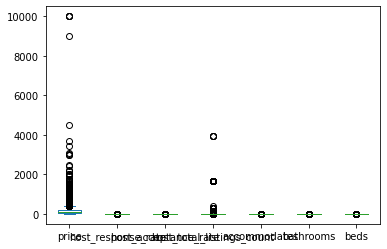

In [39]:
plot1 = nl[['price', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'accommodates', 'bathrooms', 'beds']].plot.box()

In [ ]:
nl.to_csv('project_cleaned.csv')

# 5. Summarization and Visualization

In [35]:
nl.describe()

,property_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_period,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t
count,6.349000e+03,6.349000e+03,5174.000000,5368.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,...,6349.000000,6349.000000,5276.000000,6349,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000
mean,3.188900e+07,1.174103e+08,0.935327,0.836887,0.365884,82.153567,0.820917,41.898510,-87.662905,4.096551,...,1.466215,0.141755,2.659541,1861 days 20:30:53.016223040,0.634116,0.365884,0.179083,0.820917,0.616790,0.383210
std,1.449339e+07,1.165045e+08,0.185944,0.249646,0.481715,346.166673,0.383452,0.058822,0.041781,2.844195,...,3.313489,1.328782,4.774849,939 days 08:30:50.294902576,0.481715,0.481715,0.383452,0.383452,0.486207,0.486207
min,2.384000e+03,2.153000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,41.650640,-87.846720,1.000000,...,0.000000,0.000000,0.010000,11 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.083408e+07,2.037482e+07,0.970000,0.800000,0.000000,1.000000,1.000000,41.872540,-87.686770,2.000000,...,0.000000,0.000000,0.470000,1173 days 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.513244e+07,7.419167e+07,1.000000,0.940000,0.000000,2.000000,1.000000,41.900830,-87.659510,4.000000,...,0.000000,0.000000,1.480000,1869 days 00:00:00,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,4.463361e+07,1.861151e+08,1.000000,0.990000,1.000000,9.000000,1.000000,41.939070,-87.632420,5.000000,...,1.000000,0.000000,3.300000,2509 days 00:00:00,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,5.095262e+07,4.099733e+08,1.000000,1.000000,1.000000,3924.000000,1.000000,42.022200,-87.535880,16.000000,...,24.000000,16.000000,121.820000,4711 days 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


How many unique host_id?

In [47]:
nl['host_id'].nunique()

3363

How host_response_time distribution?

<AxesSubplot:>

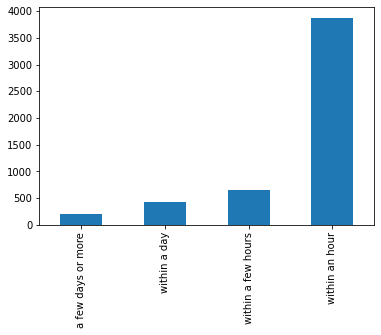

In [50]:
nl['host_response_time'].value_counts().sort_index().plot.bar()

most hosts replied within an hour!

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

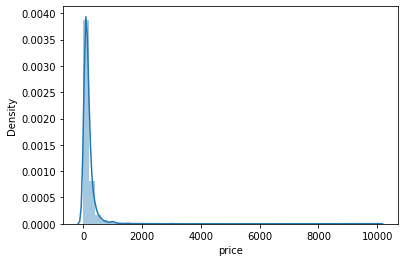

In [51]:
sb.distplot(nl['price'])